In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df_train = pd.read_csv('./train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
'''
df_train[['Id', 
        'GarageCars', # 차 들어갈수 있는 개수
        'GarageArea', # 차고 공간
        'GarageQual', # 차고 퀄리티 문자
        'GarageCond', # 차고 컨디션 문자
        'PavedDrive', # 포장된 도로 있는지 Y, N  P가잇음??
        'WoodDeckSF', # 나무 덕트 크기 숫자
        'OpenPorchSF', # 열린 입구 칸막 크기 숫자
        'EnclosedPorch', # 닫힌 입구 칸막 1252개가 0이라 필없을듯
        '3SsnPorch', # 뭘까  0 값이 1436개임
        'ScreenPorch', # 입구 창문 같은데 0 이 1344개임
        'PoolArea', # 수영장 사이즈 1453 개가 0
        'PoolQC', # 수영장 퀠리티 이건 6개빼고 넌
        'Fence', # 울타리 종류 문자  4가지 정도 
        'MiscFeature', # 잡다한 특색 거의다 0  
        'MiscVal', # 잡다한 갯수 ? 거의다 0
        'MoSold', # 월 별 판매된 
        'YrSold', # 년 별 판매된 위에거랑 같이볼 것
        'SaleType', # WD  가 1267 
        'SaleCondition', # 판매 조건? 노멀 1198 partial 125 Family도 있음..??
        'SalePrice' # 판매가격 이건 다있음
        ]].value_counts()
'''

"\ndf_train[['Id', \n        'GarageCars', # 차 들어갈수 있는 개수\n        'GarageArea', # 차고 공간\n        'GarageQual', # 차고 퀄리티 문자\n        'GarageCond', # 차고 컨디션 문자\n        'PavedDrive', # 포장된 도로 있는지 Y, N  P가잇음??\n        'WoodDeckSF', # 나무 덕트 크기 숫자\n        'OpenPorchSF', # 열린 입구 칸막 크기 숫자\n        'EnclosedPorch', # 닫힌 입구 칸막 1252개가 0이라 필없을듯\n        '3SsnPorch', # 뭘까  0 값이 1436개임\n        'ScreenPorch', # 입구 창문 같은데 0 이 1344개임\n        'PoolArea', # 수영장 사이즈 1453 개가 0\n        'PoolQC', # 수영장 퀠리티 이건 6개빼고 넌\n        'Fence', # 울타리 종류 문자  4가지 정도 \n        'MiscFeature', # 잡다한 특색 거의다 0  \n        'MiscVal', # 잡다한 갯수 ? 거의다 0\n        'MoSold', # 월 별 판매된 \n        'YrSold', # 년 별 판매된 위에거랑 같이볼 것\n        'SaleType', # WD  가 1267 \n        'SaleCondition', # 판매 조건? 노멀 1198 partial 125 Family도 있음..??\n        'SalePrice' # 판매가격 이건 다있음\n        ]].value_counts()\n"

In [92]:
# DataFrame을 넣으면 YearRemodAdd columns까지 전처리한 DataFrame return

def oh_func(df):
    slice_df = df.loc[:, "MSSubClass":"YearRemodAdd"]
    slice_df["LotFrontage"].fillna(slice_df["LotFrontage"].median(), inplace=True) # 수치형 데이터 median값으로 fillna
    slice_df["Alley"].fillna("Na", inplace=True) # (NaN값을 "Na"로)
    ##slice_df[["YearBuilt", "YearRemodAdd"]] = slice_df[["YearBuilt", "YearRemodAdd"]].apply(lambda x: np.log(x))
    return pd.get_dummies(slice_df)

In [93]:
def data3_fun(data):
    data = data.copy()
    data3 = data.iloc[:,41:61]
    
    # quality -> float형 변환
    data3['KitchenQual'].replace(['Fa','TA','Gd','Ex'], [1,2,3,4], inplace=True)
    data3['KitchenQual'] = data3['KitchenQual'].astype(np.float64)


    data3['FireplaceQu'].replace(['Po','Fa','TA','Gd','Ex'], [1,2,3,4,5], inplace=True)
    data3['FireplaceQu'] = data3['FireplaceQu'].astype(np.float64)


    # onehot-encoding
    data3_cat = data3.select_dtypes(include='object')
    data3_cat = pd.get_dummies(data3_cat, drop_first=False)
    
    data3[data3_cat.columns] = data3_cat
    data[data3.columns] = data3
    
    return data

In [94]:
from sklearn.impute import SimpleImputer

def encoding_data(data):
    data = data.copy()
    my_data = data[data.columns[21:41]] # 제가 담당하는 컬럼만 뽑아냅니다.
    my_data_cat = my_data.select_dtypes(include='object')   # 그 중 범주형 데이터만 뽑아냅니다.
    my_data_num = my_data.select_dtypes(exclude='object')

    # 평균값으로 nan 값을 채웁니다.
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(my_data_num)
    impute_data = imputer.transform(my_data_num)
    my_data_num = pd.DataFrame(impute_data, columns=my_data_num.columns, index=my_data_num.index)
    
    # 원본 데이터에 포함합니다.
    my_data[my_data_num.columns] = my_data_num
    
    # quality evaluation 형태의 컬럼만 뽑아냅니다.
    qc_column_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC']
    qc_cols = my_data_cat[qc_column_list]

    # quality evalution 형태의 컬럼 인코딩
    qc_cols[['ExterQual', 'ExterCond', 'HeatingQC']] = qc_cols[['ExterQual', 'ExterCond','HeatingQC']].replace(
        ['Ex', 'Gd', 'TA', 'Fa', 'Po'], list(reversed(range(1,6))))
    qc_cols[['BsmtQual', 'BsmtCond']] = qc_cols[['BsmtQual', 'BsmtCond']].replace(
        ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], list(reversed(range(6))))
    qc_cols['BsmtExposure'] = qc_cols['BsmtExposure'].replace(
        ['Gd', 'Av', 'Mn', 'No', 'NA'], list(reversed(range(5))))
    qc_cols[['BsmtFinType1', 'BsmtFinType2']] = qc_cols[['BsmtFinType1', 'BsmtFinType2']].replace(
        ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'], list(reversed(range(7)))).astype(np.float64)

    # 원본 데이터에 포함합니다.
    my_data_cat[qc_column_list] = qc_cols

    # 원 핫 인코딩
    my_data_cat = pd.get_dummies(my_data_cat, drop_first=False)
    # 원본 데이터에 포함합니다.
    my_data[my_data_cat.columns]=my_data_cat
    data[my_data.columns]=my_data
    return data

In [7]:
def KK_incoding(df_input):
    df_train = df_input.copy()
    df_test = df_train[[
        'GarageCars', # 차 들어갈수 있는 개수
        'GarageArea', # 차고 공간
        ]]
    df_train['GarageQual']=df_train['GarageQual'].fillna(0)
    df_test['GarageQual']=df_train['GarageQual'].replace({
                'NA':0,
                'Po':1,
                'Fa':2,
                'TA':3,
                'Gd':4,
                'Ex':5
                })
    df_train['GarageCond']=df_train['GarageCond'].fillna(0)
    df_test['GarageCond']=df_train['GarageCond'].replace({
                'NA':0,
                'Po':1,
                'Fa':2,
                'TA':3,
                'Gd':4,
                'Ex':5
                })
    df_test['PavedDrive']=df_train['PavedDrive'].replace({
                'Y':2,
                'P':1,
                'N':0
                })
    df_test['WoodDeckSF']= df_train['WoodDeckSF']
    df_test['OpenPorchSF']= df_train['OpenPorchSF']
    df_test['EnclosedPorch']= df_train['EnclosedPorch']
    df_test['3SsnPorch']= df_train['3SsnPorch']
    df_test['ScreenPorch']= df_train['ScreenPorch']
    df_test['PoolArea']= df_train['PoolArea']
    df_test['PoolQC']=df_train['PoolQC'].replace({
                'NA':0,
                'Fa':1,
                'TA':2,
                'Gd':3,
                'Ex':4
                })

    df_test['Fence']=df_train['Fence'].replace({
                'NA':0,
                'MnWw':1,
                'GdWo':2,
                'MnPrv':3,
                'GdPrv':4
                })

    #    'MiscFeature', # 잡다한 종류 문자
    from sklearn.preprocessing import OneHotEncoder
    encoder=OneHotEncoder(sparse=False)
    df_train_encoded = pd.DataFrame (encoder.fit_transform(df_train[['MiscFeature']]))
    df_train_encoded.columns = encoder.get_feature_names(['MiscFeature'])
    df_test= pd.concat([df_test, df_train_encoded ], axis=1)



    df_test['MiscVal']= df_train['MiscVal']
    df_test['MoSold']= df_train['MoSold']
    df_test['YrSold']= df_train['YrSold']


    #'SaleType' 문자
    from sklearn.preprocessing import OneHotEncoder
    encoder=OneHotEncoder(sparse=False)
    df_train_encoded = pd.DataFrame (encoder.fit_transform(df_train[['SaleType']]))
    df_train_encoded.columns = encoder.get_feature_names(['SaleType'])
    df_test= pd.concat([df_test, df_train_encoded ], axis=1)

    # 'SaleCondition' 문자
    from sklearn.preprocessing import OneHotEncoder
    encoder=OneHotEncoder(sparse=False)
    df_train_encoded = pd.DataFrame (encoder.fit_transform(df_train[['SaleCondition']]))
    df_train_encoded.columns = encoder.get_feature_names(['SaleCondition'])
    df_test= pd.concat([df_test, df_train_encoded ], axis=1)
    df_test.drop([
        'PoolQC', # 수영장 퀠리티 이건 6개빼고 넌
        'Fence', # 울타리 종류 문자  4가지 정도
        ], axis=1, inplace=True)

    df_train.drop(['Id', 
        'GarageCars', # 차 들어갈수 있는 개수
        'GarageArea', # 차고 공간
        'GarageQual', # 차고 퀄리티 문자
        'GarageCond', # 차고 컨디션 문자
        'PavedDrive', # 포장된 도로 있는지 Y, N  P가잇음??
        'WoodDeckSF', # 나무 덕트 크기 숫자
        'OpenPorchSF', # 열린 입구 칸막 크기 숫자
        'EnclosedPorch', # 닫힌 입구 칸막 1252개가 0이라 필없을듯
        '3SsnPorch', # 뭘까  0 값이 1436개임
        'ScreenPorch', # 입구 창문 같은데 0 이 1344개임
        'PoolArea', # 수영장 사이즈 1453 개가 0
        'PoolQC', # 수영장 퀠리티 이건 6개빼고 넌
        'Fence', # 울타리 종류 문자  4가지 정도 
        'MiscFeature', # 잡다한 특색 거의다 0  
        'MiscVal', # 잡다한 갯수 ? 거의다 0
        'MoSold', # 월 별 판매된 
        'YrSold', # 년 별 판매된 위에거랑 같이볼 것
        'SaleType', # WD  가 1267 
        'SaleCondition', # 판매 조건? 노멀 1198 partial 125 Family도 있음..??
        ], axis=1, inplace=True)
        
    return df_test


In [96]:
df_test=data3_fun(df_train)

In [97]:
df_test=encoding_data(df_test)

In [8]:
df_test = KK_incoding(df_train)

In [9]:
df_test

,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2,548,3,3,2,0,61,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,460,3,3,2,298,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,608,3,3,2,0,42,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,642,3,3,2,0,35,272,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,836,3,3,2,192,84,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,460,3,3,2,0,40,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,2,500,3,3,2,349,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1,252,3,3,2,0,60,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1,240,3,3,2,366,0,112,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df_train = pd.read_csv('./train.csv')
for i in df_train.columns:
    print(df_train[i].isnull().value_counts())
    print()

False    1460
Name: Id, dtype: int64

False    1460
Name: MSSubClass, dtype: int64

False    1460
Name: MSZoning, dtype: int64

False    1201
True      259
Name: LotFrontage, dtype: int64

False    1460
Name: LotArea, dtype: int64

False    1460
Name: Street, dtype: int64

True     1369
False      91
Name: Alley, dtype: int64

False    1460
Name: LotShape, dtype: int64

False    1460
Name: LandContour, dtype: int64

False    1460
Name: Utilities, dtype: int64

False    1460
Name: LotConfig, dtype: int64

False    1460
Name: LandSlope, dtype: int64

False    1460
Name: Neighborhood, dtype: int64

False    1460
Name: Condition1, dtype: int64

False    1460
Name: Condition2, dtype: int64

False    1460
Name: BldgType, dtype: int64

False    1460
Name: HouseStyle, dtype: int64

False    1460
Name: OverallQual, dtype: int64

False    1460
Name: OverallCond, dtype: int64

False    1460
Name: YearBuilt, dtype: int64

False    1460
Name: YearRemodAdd, dtype: int64

False    1460
Name: RoofStyl

In [16]:
df_train['GarageCond'].isnull().value_counts()

False    1379
True       81
Name: GarageCond, dtype: int64

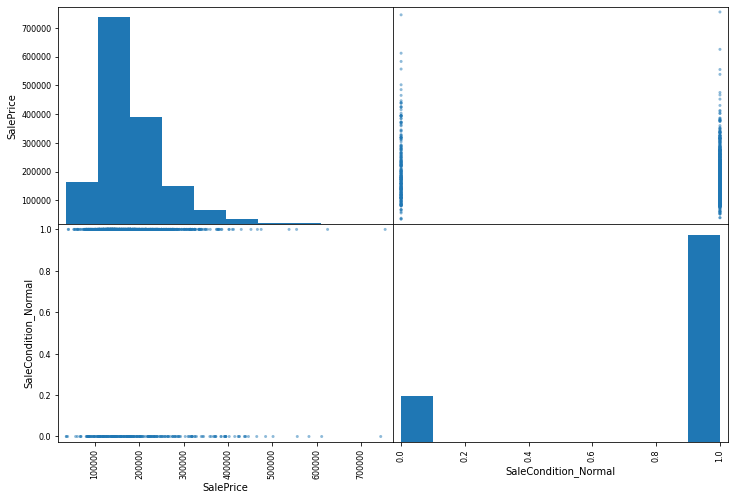

In [71]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice","SaleCondition_Normal"]
scatter_matrix(df_test[attributes], figsize=(12,8))
plt.show()